## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from keras.utils.np_utils import to_categorical
from sklearn import decomposition
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import time

## Loading Data

In [ ]:
!unzip -q "/content/drive/MyDrive/Quantum/train.csv.zip"


In [ ]:
train_data = pd.read_csv('/content/train.csv')

In [ ]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Visulization using PCA

In [ ]:
X = train_data.drop(['label'],axis=1)
y = train_data['label']


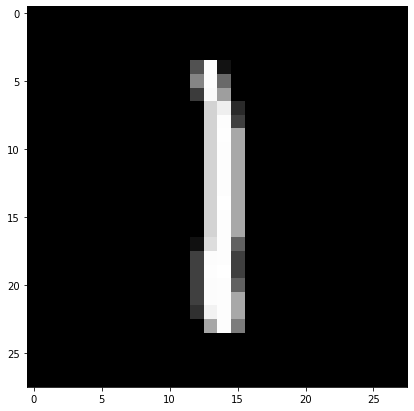

1


In [ ]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 1000

grid_data = X.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(y[idx])

In [ ]:
# initializing the pca
pca = decomposition.PCA()

In [ ]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(X)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


shape of pca_reduced.shape =  (42000, 2)
Explained variation per principal component: [0.09748938 0.07160266]


In [ ]:
pca_data = np.vstack((pca_data.T, y)).T


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


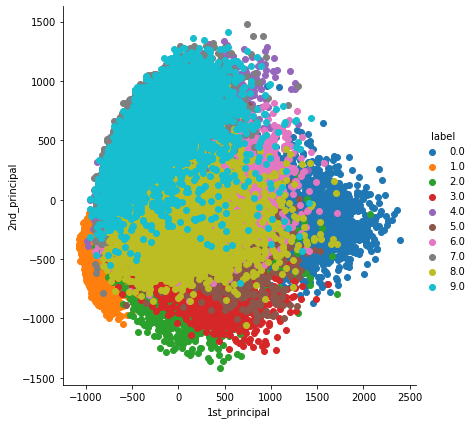

In [ ]:
# attaching the label for each 2-d data point 

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## Applying machine learning algorith without using PCA

In [ ]:
X_train = train_data.drop(['label'], axis=1)
y_train = train_data['label']

X_train = X_train / 255.0
x_test = y_train / 255.0

y_train = to_categorical(y_train, num_classes=10)

In [ ]:
#spliting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25)

In [ ]:
#here we are training random forest classifier with max_depth of 16(choosen randomly)
clf = RandomForestClassifier(max_depth = 16)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=16)

In [ ]:
from sklearn.metrics import accuracy_score

train_pred = clf.predict(X_train)
train_acc = accuracy_score(y_train,train_pred)

test_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test,test_pred)

print("Train accuracy",train_acc)
print("Test accuracy",test_acc)


Train accuracy 0.9985185185185185
CV accuracy 0.8653968253968254


### Observation For Model without using PCA

After applying random forest we are getting accuracy of 99% accuracy on train data and 86.5% on test data which is good. Here we perform this experiment without using dimension reduction technique PCA.

## Model after applying PCA

let check wheather model performace will increase or not after performing dimension reduction. 

In [ ]:
X_train = train_data.drop(['label'], axis=1)
y_train = train_data['label']

In [ ]:
## Scaling data
from sklearn.preprocessing import StandardScaler
standardized_features = StandardScaler().fit_transform(X_train)

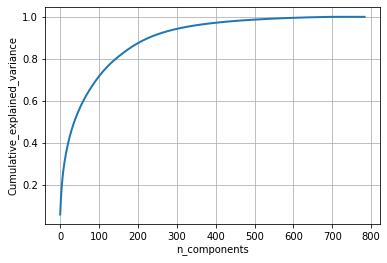

In [ ]:


pca.n_components = 784
pca_data = pca.fit_transform(standardized_features)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()




Above graph gives varience explained on different number of principal components.
As we can see from above graph we are preserving/explaining like around 90% of varience on value of 200 component so we train the model based on 200 principal component and check wheather model perform well or not

Here we are applying same random forest with max_depth = 16 as we used above.

In [ ]:
#puttin 200 principal components on scaled data
pca.n_components = 200
X_pca_data = pca.fit_transform(standardized_features)
X_pca_data.shape

(42000, 200)

In [ ]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca_data, y_train, test_size=0.25)

In [ ]:
clf = RandomForestClassifier(max_depth = 16)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=16)

In [ ]:
from sklearn.metrics import accuracy_score

train_pred = clf.predict(X_train)
tr_acc = accuracy_score(y_train,train_pred)

test_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test,test_pred)

print("Train accuracy",tr_acc)
print("Test accuracy",test_acc)

Train accuracy 0.9997142857142857
Test accuracy 0.9322857142857143


### Obervation on model after using PCA

As we can see from above we get 93% accuracy on our test data after reducing dimension.
We can improve accuracy of our model using hyperparameter tunning trying different values for max_depth, min_samples_leaf etc. which could definitely increase our model performace at some extend



Done....!